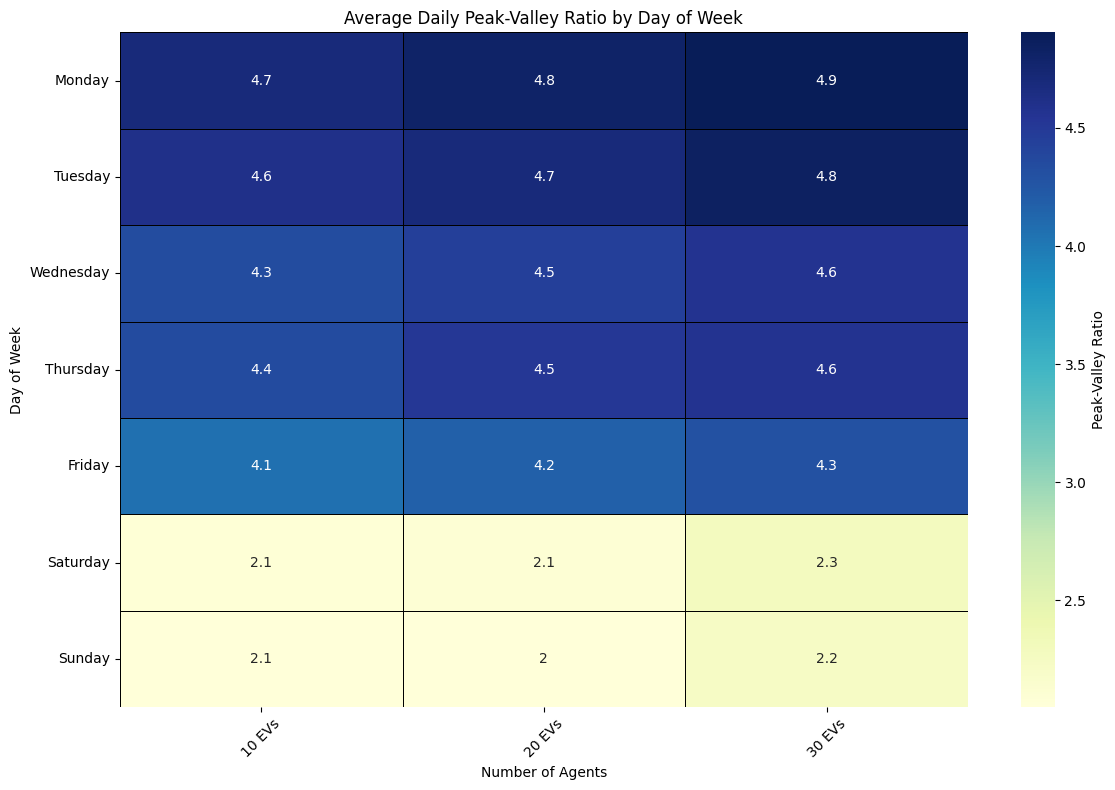

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_10_agents = pd.read_csv('./Result/GB-MARL-v2_alpha0.5_beta0.5_num10/2/building_loading_history.csv')
data_20_agents = pd.read_csv('./Result/GB-MARL-v2_alpha0.5_beta0.5_num20/1/building_loading_history.csv')
data_30_agents = pd.read_csv('./Result/GB-MARL-v2_alpha0.5_beta0.5_num30/1/building_loading_history.csv')

# Combine data into a dictionary
data_dict = {
    '10 EVs': data_10_agents,
    '20 EVs': data_20_agents,
    '30 EVs': data_30_agents
}

# Function to calculate daily peak-valley ratio
def calculate_peak_valley_ratio(data):
    data['current_time'] = pd.to_datetime(data['current_time'])
    data['day_of_week'] = data['current_time'].dt.day_name()
    data['date'] = data['current_time'].dt.date
    
    filtered_data = data[data['current_time'].dt.hour.between(7, 23)]
    daily_peak_valley = filtered_data.groupby('date')['total_load'].agg(['max', 'min']).reset_index()
    daily_peak_valley['peak_valley_ratio'] = daily_peak_valley['max'] / daily_peak_valley['min']
    daily_peak_valley['day_of_week'] = pd.to_datetime(daily_peak_valley['date']).dt.day_name()
    
    return daily_peak_valley

# Calculate average peak-valley ratio by day of week
average_peak_valley_by_day = {}

for key, df in data_dict.items():
    daily_peak_valley = calculate_peak_valley_ratio(df)
    avg_peak_valley = daily_peak_valley.groupby('day_of_week')['peak_valley_ratio'].mean()
    average_peak_valley_by_day[key] = avg_peak_valley

# Create DataFrame for heatmap
heatmap_data = pd.DataFrame(average_peak_valley_by_day)

# Reorder days of the week for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=.5, linecolor='black', cbar_kws={'label': 'Peak-Valley Ratio'})
plt.title('Average Daily Peak-Valley Ratio by Day of Week')
plt.xlabel('Number of Agents')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

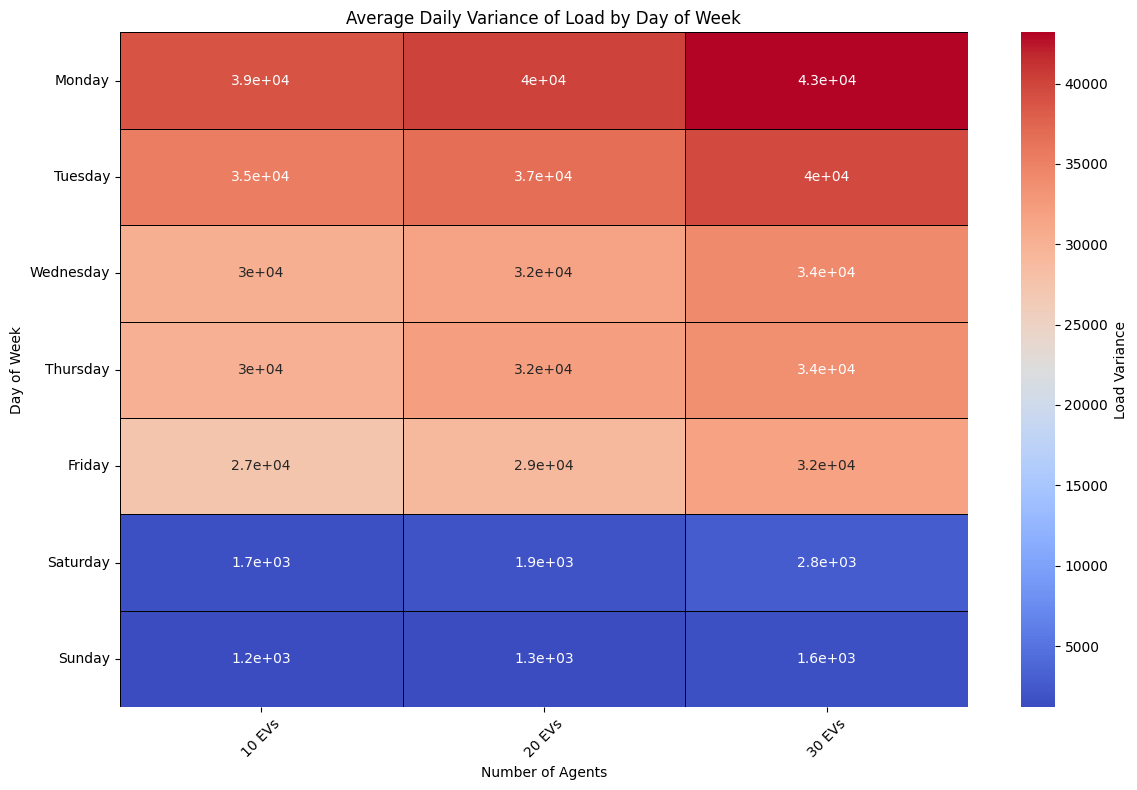

In [3]:
def calculate_daily_variance(data):
    data['current_time'] = pd.to_datetime(data['current_time'])
    data['day_of_week'] = data['current_time'].dt.day_name()
    data['date'] = data['current_time'].dt.date
    
    daily_variance = data[data['current_time'].dt.hour.between(7, 23)].groupby(['date'])['total_load'].var().reset_index()
    daily_variance['day_of_week'] = pd.to_datetime(daily_variance['date']).dt.day_name()
    
    return daily_variance

# Calculate average variance by day of week
average_variance_by_day = {}

for key, df in data_dict.items():
    daily_variance = calculate_daily_variance(df)
    avg_variance = daily_variance.groupby('day_of_week')['total_load'].mean()
    average_variance_by_day[key] = avg_variance

# Create DataFrame for heatmap
variance_heatmap_data = pd.DataFrame(average_variance_by_day)

# Reorder days of the week for plotting
variance_heatmap_data = variance_heatmap_data.reindex(days_order)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(variance_heatmap_data, annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', cbar_kws={'label': 'Load Variance'})
plt.title('Average Daily Variance of Load by Day of Week')
plt.xlabel('Number of Agents')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

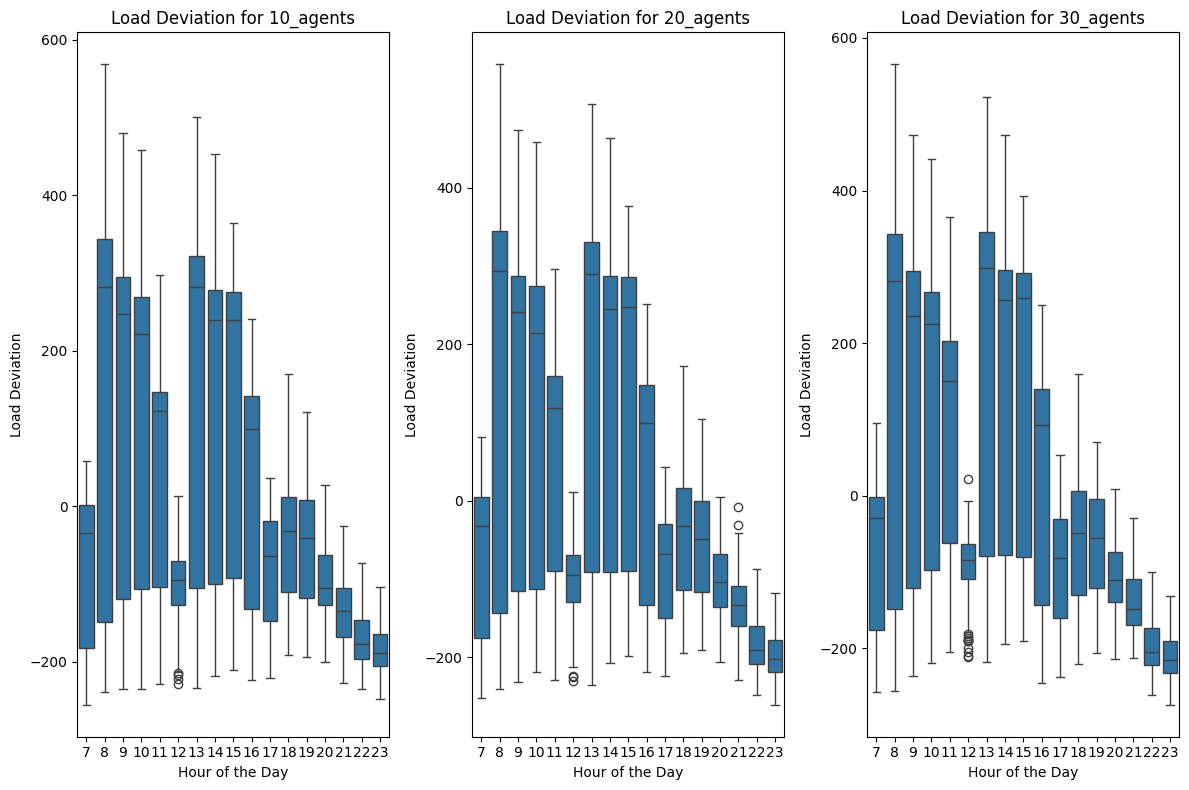

In [4]:
def calculate_load_deviation(data):
    data['current_time'] = pd.to_datetime(data['current_time'])
    data['hour'] = data['current_time'].dt.hour
    data['load_deviation'] = data['total_load'] - data['total_load'].mean()
    
    return data

# Calculate load deviation
load_deviation_by_agent = {}

for key, df in data_dict.items():
    load_deviation_by_agent[key] = calculate_load_deviation(df)

# Plot box plot for each agent configuration
plt.figure(figsize=(12, 8))
for i, (key, df) in enumerate(load_deviation_by_agent.items(), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='hour', y='load_deviation', data=df)
    plt.title(f'Load Deviation for {key}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Load Deviation')

plt.tight_layout()
plt.show()

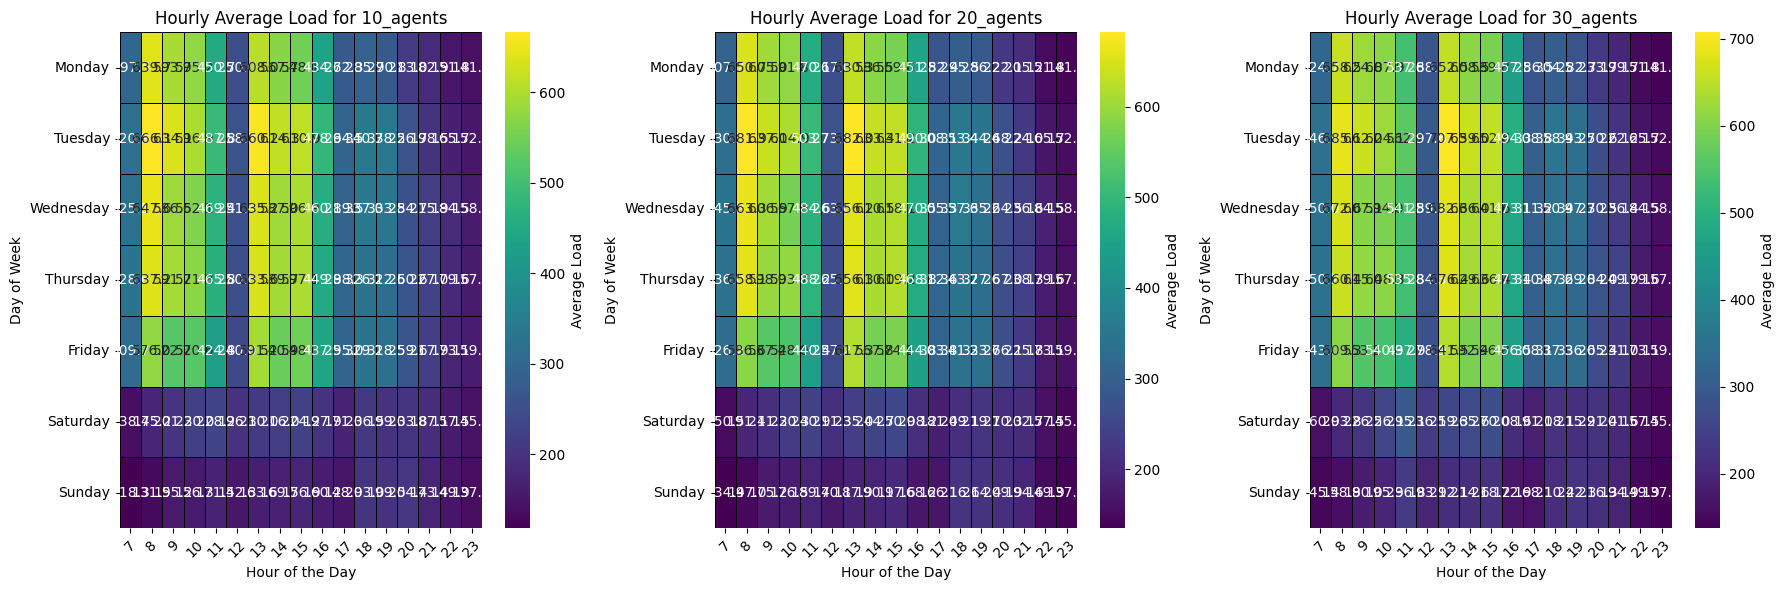

In [5]:
def calculate_hourly_average_load(data):
    data['current_time'] = pd.to_datetime(data['current_time'])
    data['day_of_week'] = data['current_time'].dt.day_name()
    data['hour'] = data['current_time'].dt.hour
    
    hourly_avg_load = data.groupby(['day_of_week', 'hour'])['total_load'].mean().unstack()
    
    return hourly_avg_load

# Calculate hourly average load
hourly_avg_load_by_agent = {}

for key, df in data_dict.items():
    hourly_avg_load_by_agent[key] = calculate_hourly_average_load(df)

# Plot heatmap for each agent configuration
plt.figure(figsize=(18, 6))
for i, (key, hourly_avg_load) in enumerate(hourly_avg_load_by_agent.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(hourly_avg_load.reindex(days_order), annot=True, fmt=".1f", cmap='viridis', linewidths=.5, linecolor='black', cbar_kws={'label': 'Average Load'})
    plt.title(f'Hourly Average Load for {key}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Day of Week')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [6]:
def normalize_data(df):
    df['normalized_load'] = (df['total_load'] - df['total_load'].min()) / (df['total_load'].max() - df['total_load'].min())
    return df

# Normalize data for all agent configurations
normalized_data_dict = {key: normalize_data(df) for key, df in data_dict.items()}

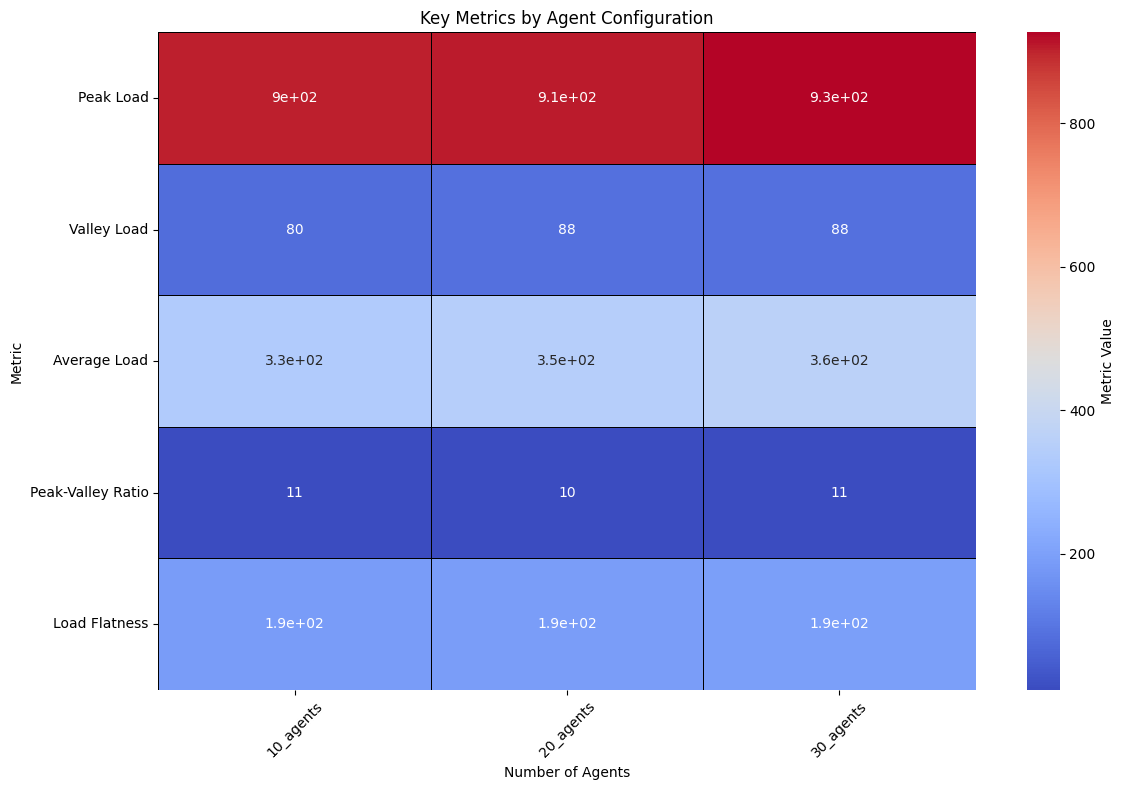

In [7]:
def calculate_key_metrics(data):
    data['current_time'] = pd.to_datetime(data['current_time'])
    data['hour'] = data['current_time'].dt.hour
    
    peak_load = data[data['hour'].between(7, 23)]['total_load'].max()
    valley_load = data[data['hour'].between(7, 23)]['total_load'].min()
    avg_load = data[data['hour'].between(7, 23)]['total_load'].mean()
    
    peak_valley_ratio = peak_load / valley_load
    load_flatness = data[data['hour'].between(7, 23)]['total_load'].std()
    
    return peak_load, valley_load, avg_load, peak_valley_ratio, load_flatness

# Calculate key metrics for each agent configuration
metrics = {key: calculate_key_metrics(df) for key, df in normalized_data_dict.items()}

# Convert metrics to DataFrame for easier visualization
metrics_df = pd.DataFrame(metrics, index=['Peak Load', 'Valley Load', 'Average Load', 'Peak-Valley Ratio', 'Load Flatness'])

# Plot key metrics
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', linewidths=.5, linecolor='black', cbar_kws={'label': 'Metric Value'})
plt.title('Key Metrics by Agent Configuration')
plt.xlabel('Number of Agents')
plt.ylabel('Metric')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

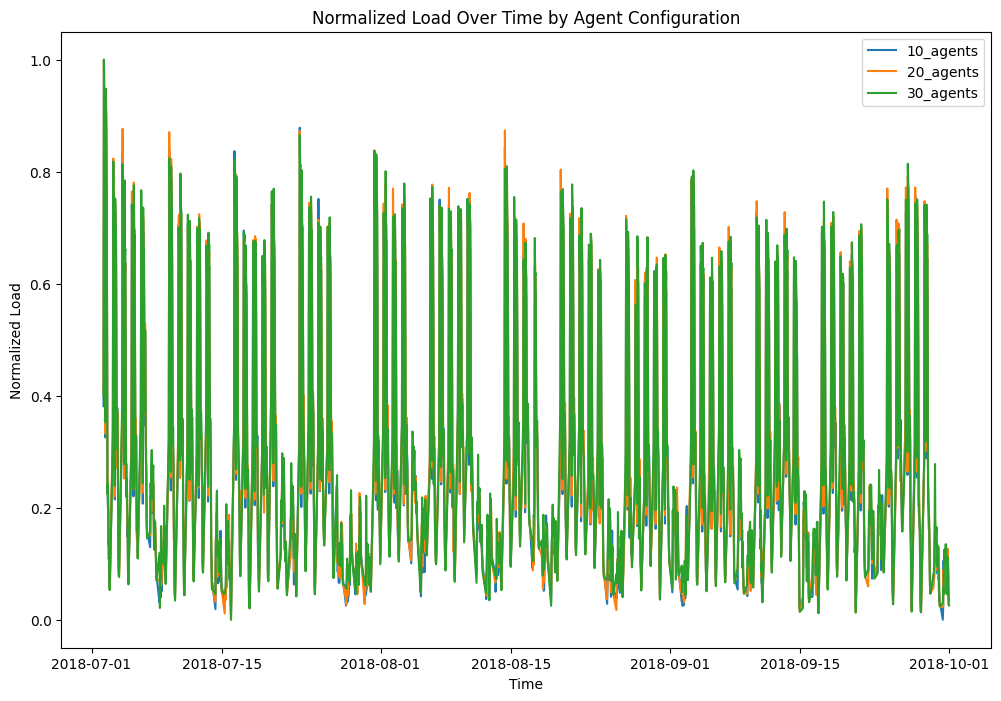

In [8]:
plt.figure(figsize=(12, 8))

for key, df in normalized_data_dict.items():
    plt.plot(df['current_time'], df['normalized_load'], label=f'{key}')

plt.title('Normalized Load Over Time by Agent Configuration')
plt.xlabel('Time')
plt.ylabel('Normalized Load')
plt.legend()
plt.show()